In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [7]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | salisbury
Processing Record 9 of Set 1 | teya
Processing Record 10 of Set 1 | nuuk
Processing Record 11 of Set 1 | turinskaya sloboda
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | honggang
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | mogadishu
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | challapata
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | marivan
Processing Record 21 of S

Processing Record 36 of Set 4 | sulangan
Processing Record 37 of Set 4 | narsaq
Processing Record 38 of Set 4 | sobolevo
Processing Record 39 of Set 4 | beringovskiy
Processing Record 40 of Set 4 | pincher creek
Processing Record 41 of Set 4 | novyy urengoy
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | fort nelson
Processing Record 44 of Set 4 | mareeba
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | tevaitoa
Processing Record 47 of Set 4 | yalvac
Processing Record 48 of Set 4 | saurimo
Processing Record 49 of Set 4 | kamenka
Processing Record 50 of Set 4 | poum
Processing Record 1 of Set 5 | lagoa
Processing Record 2 of Set 5 | along
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | xining
Processing Record 5 of Set 5 | amapa
Processing Record 6 of Set 5 | coquimbo
Processing Record 7 of Set 5 | suntar
Processing Record 8 of Set 5 | port-cartier
Processing Record 9 of Set 5 | khatanga
Processing Record 10 of S

Processing Record 27 of Set 8 | gurskoye
City not found. Skipping...
Processing Record 28 of Set 8 | harbour breton
Processing Record 29 of Set 8 | havre-saint-pierre
Processing Record 30 of Set 8 | dubna
Processing Record 31 of Set 8 | ozernovskiy
Processing Record 32 of Set 8 | verkhnevilyuysk
Processing Record 33 of Set 8 | popondetta
Processing Record 34 of Set 8 | dudinka
Processing Record 35 of Set 8 | muravlenko
Processing Record 36 of Set 8 | peno
Processing Record 37 of Set 8 | tawnat
City not found. Skipping...
Processing Record 38 of Set 8 | new norfolk
Processing Record 39 of Set 8 | amderma
City not found. Skipping...
Processing Record 40 of Set 8 | nago
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | krasnoselkup
Processing Record 43 of Set 8 | biak
Processing Record 44 of Set 8 | palauig
Processing Record 45 of Set 8 | tiznit
Processing Record 46 of Set 8 | saleaula
City not found. Skipping...
Processing Record 47 of Set 8 | karkaralinsk
City not f

Processing Record 13 of Set 12 | sebina
Processing Record 14 of Set 12 | saint-louis
Processing Record 15 of Set 12 | maragogi
Processing Record 16 of Set 12 | dapaong
Processing Record 17 of Set 12 | odesskoye
Processing Record 18 of Set 12 | greenfield
Processing Record 19 of Set 12 | jiddah
City not found. Skipping...
Processing Record 20 of Set 12 | novikovo
Processing Record 21 of Set 12 | hun
Processing Record 22 of Set 12 | zelenoborskiy
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | kiama
Processing Record 25 of Set 12 | port shepstone
Processing Record 26 of Set 12 | north myrtle beach
Processing Record 27 of Set 12 | teguldet
Processing Record 28 of Set 12 | cleveland
Processing Record 29 of Set 12 | chuy
Processing Record 30 of Set 12 | awjilah
Processing Record 31 of Set 12 | victor harbor
Processing Record 32 of Set 12 | malbork
Processing Record 33 of Set 12 | sahrak
City not found. Skipping...
Processing Record 34 of Set 12 | olavarria
Processing

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,76,20,3.44,AR,2021-04-25 02:13:28
1,Cherskiy,68.7500,161.3000,21.88,82,100,13.02,RU,2021-04-25 02:14:55
2,Atuona,-9.8000,-139.0333,80.80,73,62,16.08,PF,2021-04-25 02:15:19
3,Kapaa,22.0752,-159.3190,78.80,65,20,14.97,US,2021-04-25 02:15:43
4,Bethel,41.3712,-73.4140,55.00,56,100,3.98,US,2021-04-25 02:15:44
5,Punta Arenas,-53.1500,-70.9167,44.60,70,0,9.22,CL,2021-04-25 02:15:44
6,Salisbury,51.0693,-1.7957,42.01,70,0,8.05,GB,2021-04-25 02:15:45
7,Teya,60.3778,92.6267,37.60,85,100,2.89,RU,2021-04-25 02:13:17
8,Nuuk,64.1835,-51.7216,46.40,49,75,12.66,GL,2021-04-25 02:15:45
9,Turinskaya Sloboda,57.6232,64.3858,43.79,55,100,9.13,RU,2021-04-25 02:15:46


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
                    
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-04-25 02:13:28,-54.8000,-68.3000,44.60,76,20,3.44
1,Cherskiy,RU,2021-04-25 02:14:55,68.7500,161.3000,21.88,82,100,13.02
2,Atuona,PF,2021-04-25 02:15:19,-9.8000,-139.0333,80.80,73,62,16.08
3,Kapaa,US,2021-04-25 02:15:43,22.0752,-159.3190,78.80,65,20,14.97
4,Bethel,US,2021-04-25 02:15:44,41.3712,-73.4140,55.00,56,100,3.98
...,...,...,...,...,...,...,...,...,...
572,Ati,TD,2021-04-25 02:19:11,13.2154,18.3353,80.24,43,68,9.10
573,Port Hardy,CA,2021-04-25 02:15:10,50.6996,-127.4199,50.00,81,90,3.44
574,Gambo,CF,2021-04-25 02:19:11,4.6482,22.2633,68.07,98,100,2.19
575,Nassau,US,2021-04-25 02:19:12,40.7507,-73.5829,59.00,54,20,5.75


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") 

In [11]:
# Extract relevant fields from th eDataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

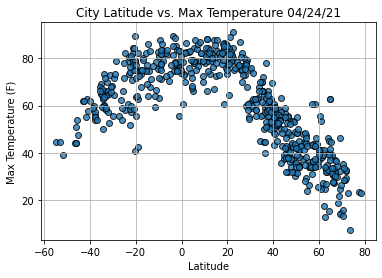

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

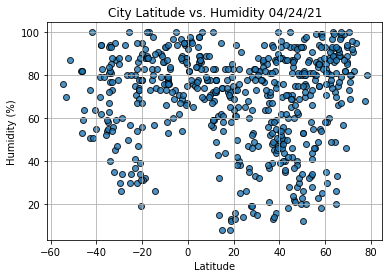

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

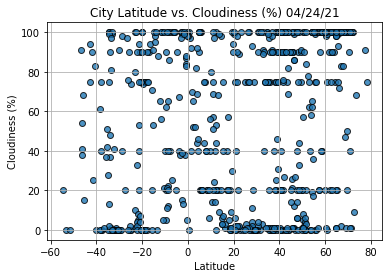

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

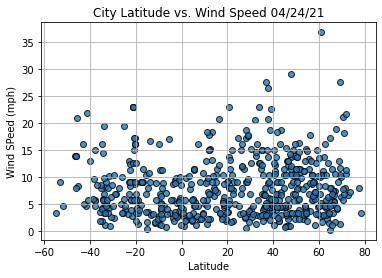

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind SPeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City               Port Elizabeth
Country                        ZA
Date          2021-04-25 02:13:52
Lat                       -33.918
Lng                       25.5701
Max Temp                       59
Humidity                       94
Cloudiness                     90
Wind Speed                   6.91
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
572     True
573     True
574     True
575     True
576     True
Name: Lat, Length: 577, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cherskiy,RU,2021-04-25 02:14:55,68.7500,161.3000,21.88,82,100,13.02
3,Kapaa,US,2021-04-25 02:15:43,22.0752,-159.3190,78.80,65,20,14.97
4,Bethel,US,2021-04-25 02:15:44,41.3712,-73.4140,55.00,56,100,3.98
6,Salisbury,GB,2021-04-25 02:15:45,51.0693,-1.7957,42.01,70,0,8.05
7,Teya,RU,2021-04-25 02:13:17,60.3778,92.6267,37.60,85,100,2.89


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

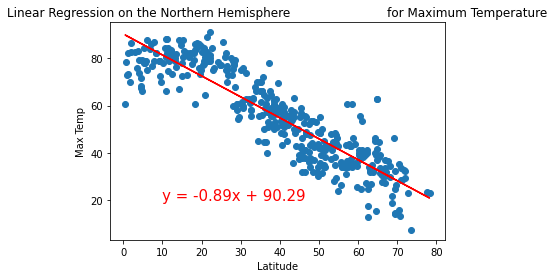

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp",(10,20))

In [22]:
linregress(x_values, y_values)

LinregressResult(slope=-0.8871392546662802, intercept=90.29193502569476, rvalue=-0.8963689020882184, pvalue=4.195709246983067e-144, stderr=0.021882576281088237)

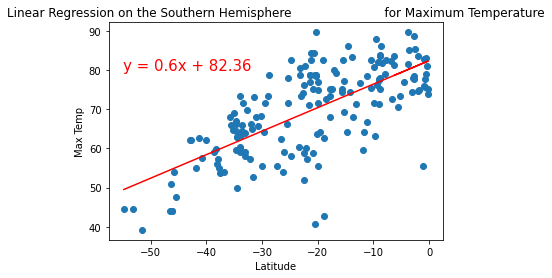

In [23]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature", "Max Temp", (-55,80))

In [24]:
linregress(x_values, y_values)

LinregressResult(slope=0.5995628719898578, intercept=82.3610638042062, rvalue=0.7005803282530401, pvalue=7.495607620615536e-27, stderr=0.04670006424452096)

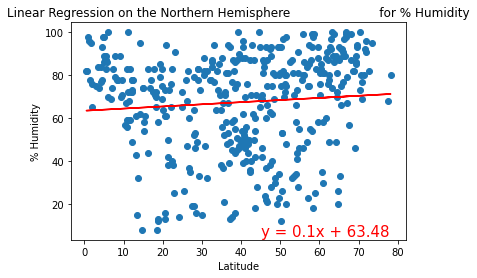

In [25]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Humidity", "% Humidity", (45,5))

In [26]:
linregress(x_values, y_values)

LinregressResult(slope=0.09942799373518565, intercept=63.47708716515629, rvalue=0.08526546381646266, pvalue=0.08696623506615299, stderr=0.05794794249587966)

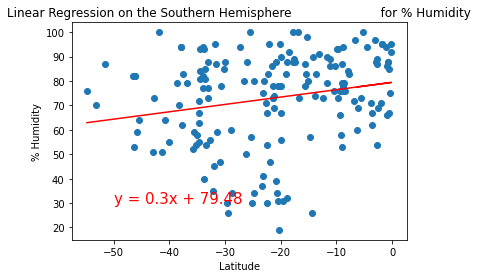

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for % Humidity", "% Humidity",(-50,30))

In [28]:
linregress(x_values, y_values)

LinregressResult(slope=0.30175466391576866, intercept=79.47965988089491, rvalue=0.21258029323867256, pvalue=0.004985730006637171, stderr=0.10606969670624555)

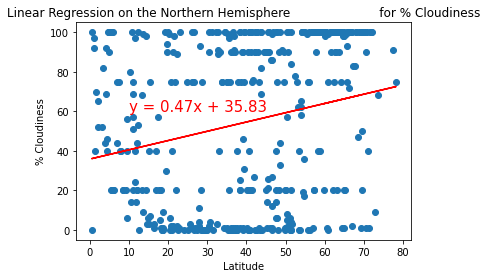

In [29]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere \
                      for % Cloudiness", "% Cloudiness",(10,60))

In [30]:
linregress(x_values, y_values)

LinregressResult(slope=0.4691174088603304, intercept=35.82549812788039, rvalue=0.2247074299351092, pvalue=5.0903734817844e-06, stderr=0.1014612195093813)

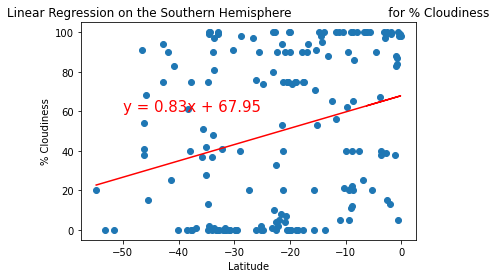

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [32]:
linregress(x_values, y_values)

LinregressResult(slope=0.8256097162659821, intercept=67.94851793668455, rvalue=0.2749896654949041, pvalue=0.0002506935305733384, stderr=0.22074241943563655)

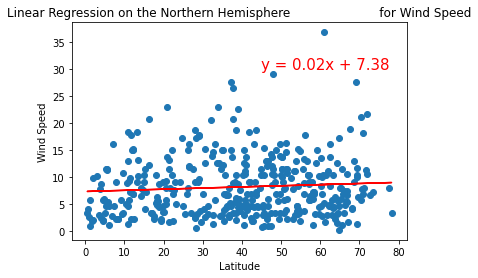

In [33]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Wind Speed", "Wind Speed", (45,30))

In [34]:
linregress(x_values, y_values)

LinregressResult(slope=0.02108267059410371, intercept=7.378472297260705, rvalue=0.07671070009299505, pvalue=0.12371703708505204, stderr=0.0136670589001235)

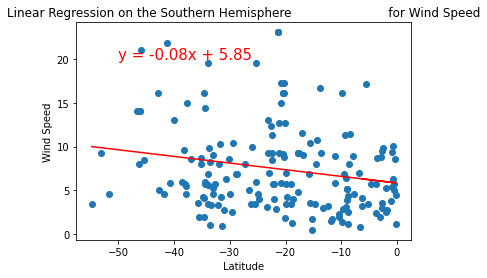

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Wind Speed", "Wind Speed",(-50,20))

In [36]:
linregress(x_values, y_values)

LinregressResult(slope=-0.07569566499492446, intercept=5.849846227759276, rvalue=-0.20203106470546062, pvalue=0.00768547502670982, stderr=0.02806116122419177)